In [1]:
import pandas as pd
from matplotlib import pyplot as plt

plt.style.use("fivethirtyeight")
%matplotlib inline

In [2]:
df = pd.read_csv('historical_data.csv')

In [3]:
#dropping some extreme cases that skew the data
df = df.drop([1, 2950, 3904, 1032, 1926, 2620, 589, 2947, 948, 1031, 1353])

In [4]:
#cleaning the dates
df[['start_timestamp','stop_timestamp']] = df[['start_timestamp','stop_timestamp']].replace('T', ' ', regex=True)
df[['start_timestamp','stop_timestamp']] = df[['start_timestamp','stop_timestamp']].replace('Z', '', regex=True) 
df[['start_timestamp','stop_timestamp']] = df[['start_timestamp','stop_timestamp']].apply(pd.to_datetime)

In [5]:
#calculating the time of charge session in minutes
df['tot_minutes_diff'] = (df.stop_timestamp - df.start_timestamp) / pd.Timedelta(minutes=1)

In [6]:
#Average time of a charging session
mean_charging_time = df.tot_minutes_diff.mean()
mean_charging_time

39.4853595232758

In [7]:
df['weekday'] = df['start_timestamp'].dt.dayofweek

([0, 1, 2, 3, 4, 5, 6],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

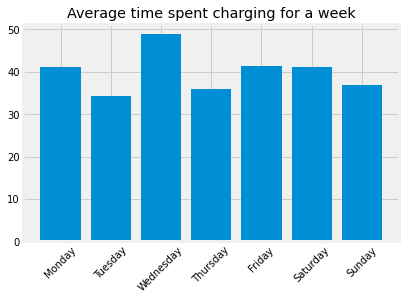

In [8]:
#Average time of a charging session per day of the week
charge_day_df = df.groupby('weekday',as_index=False)['tot_minutes_diff'].mean()
charge_day_df
plt.bar(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], 
        charge_day_df['tot_minutes_diff'])
plt.title('Average time spent charging for a week')
plt.xticks(rotation=45)

<BarContainer object of 10 artists>

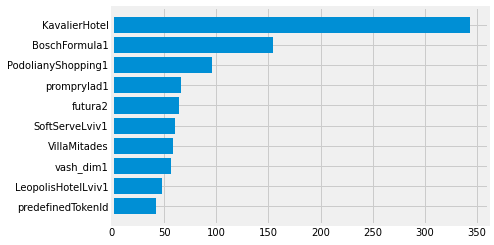

In [9]:
#Average time of a charging session per charge station
#How much time on average a user spends in these charge stations
df_seperated=df.groupby('charge_box_id', as_index=False)['tot_minutes_diff'].mean()
df_tags=df.groupby('charge_box_id', as_index=False)['id_tag'].first()
df_seperated['id_tag']=df_tags['id_tag']
df_seperated.sort_values(by=['tot_minutes_diff'], inplace=True, ascending=True)
df_seperated = df_seperated.tail(10)
plt.barh(df_seperated['id_tag'], df_seperated['tot_minutes_diff'])


In [10]:
df['energy transferred(kWh)'] = (df['stop_value'] - df['start_value'])/1000

In [11]:
df['Power(kW)'] = df['energy transferred(kWh)']/(df['tot_minutes_diff']/60)

In [12]:
df = df.assign(time_of_Day=pd.cut(df.start_timestamp.dt.hour,[-1, 1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23],
                           labels=['0-2am', '2-4am', '4-6am', '6-8am', '8-10am', '10-12am', '12-2pm',
                                   '2-4pm', '4-6pm', '6-8pm', '8-10pm', '10-12pm']))

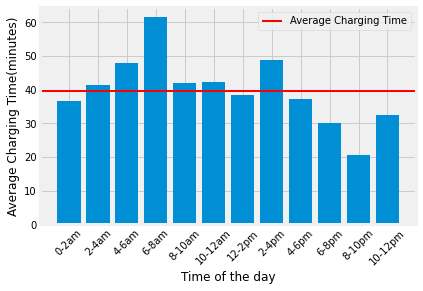

In [13]:
#histogram for a day(average minutes spent charging)
histogram_df1 = df.groupby('time_of_Day', as_index=False)['tot_minutes_diff'].mean()
histogram_df1
time = histogram_df1['time_of_Day']
avgmins = histogram_df1['tot_minutes_diff']
plt.xticks(rotation=45)
plt.bar(time, avgmins)
plt.axhline(mean_charging_time, color='r', label='Average Charging Time', linewidth='2')
plt.xlabel('Time of the day')
plt.ylabel('Average Charging Time(minutes)')
plt.legend()



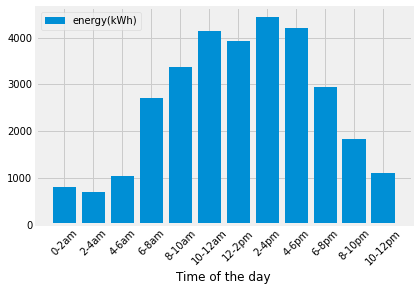

In [14]:
#histogram for a day(total energy demand)
histogram_df2 = df.groupby('time_of_Day', as_index=False)['energy transferred(kWh)'].sum()
totenergy = histogram_df2['energy transferred(kWh)']
plt.xticks(rotation=45)
plt.bar(time, totenergy, label='energy(kWh)')
plt.xlabel('Time of the day')


plt.legend()

<BarContainer object of 10 artists>

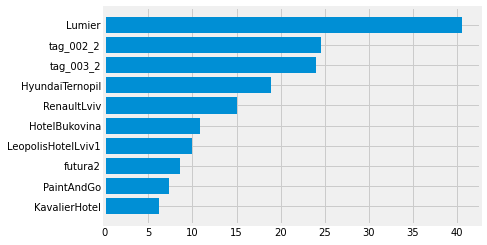

In [15]:
#expected power from a station
charger_power_df = df.groupby('charge_box_id', as_index=False)['Power(kW)'].mean()
charger_power_df['id_tag']=df_tags['id_tag']
charger_power_df.sort_values(by=['Power(kW)'], inplace=True, ascending=True)
charger_power_df = charger_power_df.tail(10)
plt.barh(charger_power_df['id_tag'], charger_power_df['Power(kW)'])


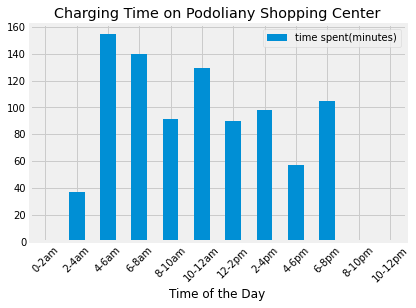

In [16]:
PodShop_time_df = df[df['id_tag'] == 'PodolianyShopping1'].groupby('time_of_Day')['tot_minutes_diff'].mean()
PodShop_time_df
PodShop_time_df.plot(kind='bar', title='Charging Time on Podoliany Shopping Center', label='time spent(minutes)')
plt.xticks(rotation=45)
plt.xlabel('Time of the Day')
plt.legend()

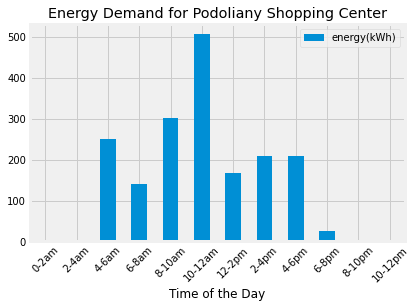

In [17]:
PodShop_energy_df = df[df['id_tag'] == 'PodolianyShopping1'].groupby('time_of_Day')['energy transferred(kWh)'].sum()
PodShop_energy_df
PodShop_energy_df.plot(kind='bar', title='Energy Demand for Podoliany Shopping Center', label='energy(kWh)')
plt.xticks(rotation=45)
plt.xlabel('Time of the Day')
plt.legend()

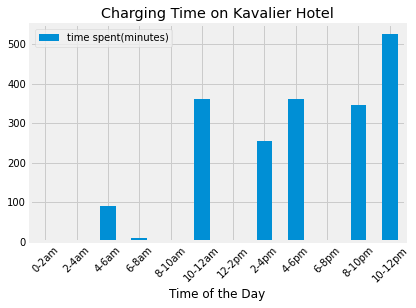

In [18]:
KavHot_time_df = df[df['id_tag'] == 'KavalierHotel'].groupby('time_of_Day')['tot_minutes_diff'].mean()
KavHot_time_df
KavHot_time_df.plot(kind='bar', title='Charging Time on Kavalier Hotel', label='time spent(minutes)')
plt.xticks(rotation=45)
plt.xlabel('Time of the Day')
plt.legend()

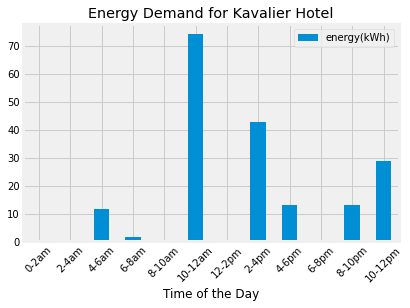

In [19]:
KavHot_energy_df = df[df['id_tag'] == 'KavalierHotel'].groupby('time_of_Day')['energy transferred(kWh)'].sum()
KavHot_energy_df
KavHot_energy_df.plot(kind='bar', title='Energy Demand for Kavalier Hotel', label='energy(kWh)')
plt.xticks(rotation=45)
plt.xlabel('Time of the Day')
plt.legend()